# RESUMEN TEÓRICO: Control sintético

**Metodología--¿Qué estamos estimando?**

- Para cada unidad $j$ y tiempo $t$, sea $Y^N_{jt}$ el estado potencial de la variable de tratamiento en ausencia de tratamiento. Similarmente, para $j = 1$ y $t > T_0$, denote por $Y'_{1t}$ el estado potencial de la unidad 1 cuando es tratada.

- El efecto de interés es entonces
  $$ \tau_{1t} = Y'_{1t} - Y^N_{1t}; \quad t > T_0 $$

- Sabemos que para $j = 1$ y $t > T_0$ tenemos que $Y'_{1t} = Y_{1t}$, La gran pregunta entonces es **cómo encontramos una aproximación para** $Y^N_{1t}$.


### Estimación-Contrafactual

- Queremos aproximar la variable dependiente de la unidad tratada en ausencia de tratamiento usando las unidades no tratadas, a modo de crear una unidad $j = 1$ sintética. De ahí que, debemos escoger pesos $W = [w_2 \ldots w_{J+1}]^T$, de manera que el clon de $j = 1$ sea una combinación convexa de las unidades sin tratar usando esos pesos.

- Dado un vector de pesos $W = [w_2 \ldots w_{J+1}]^T$, podemos construir el resultado potencial sintético como
  $$ \hat{Y}^N_{1t} = \sum_{j=2}^{J+1} w_j Y_{j,t} $$

y, naturalmente, el efecto causal estimado como
  $$ \hat{\tau}_t = Y_{1,t} - \hat{Y}^N_{1t} $$


#### Estimación-¿Cómo elegimos los pesos de una manera óptima?

- El siguiente paso es elegir los pesos \( W \). Queremos elegir los pesos de manera que la unidad sintética replique de la mejor manera a la unidad tratada antes del tratamiento.

- Abadie, Diamond & Hainmuller (2010) proponen minimizar una norma pesada:
  $$ W^*(V) = \underset{w}{\operatorname{argmin}} \left\| X_1 - X_0 W \right\|_V = \sqrt{(X_1 - X_0 W)'V(X_1 - X_0 W)} $$
  donde \( V = [v_1, \ldots , v_k] \) son los pesos dados a cada característica predeterminada en la predicción.

- Los pesos \( V \) deben interpretarse como la relevancia de cada variable predictora en la definición del control sintético.


- Para cada elección de los pesos de la norma \( V \), podemos obtener unos pesos óptimos \( W^*(V) \). ¿Cómo elegimos \( V \)?

- Abadie & Gardeazabal (2003) sugirieron que la manera de dilucidar cuáles características deben recibir mayor peso son aquellas que mejor nos ayudan a reproducir la evolución de la unidad en el tiempo.

- Por ello, sugieren minimizar el error de predicción cuadrático medio (MSPE) en el período pre-tratamiento, esto es,
  $$ V^* = \underset{V}{\operatorname{argmin}} \sum_{t \in T_0} \left( Y_{1,t} - w_2(V) Y_{2t} - \ldots - w_{J+1}(V) Y_{J+1,t} \right)^2 $$
  donde \( T_0 \subseteq \{1, 2, \ldots , T_0\} \) es un conjunto de períodos previos al tratamiento. Idealmente no se deben tomar todos, para evaluar si la elección es confiable o no.


### Resumen

Para realizar la metodología de control sintético, Abadie (2021) sugiere lo siguiente

1. Dividir los períodos de pre-tratamiento en 2: uno de entrenamiento y uno de validación. Supongamos que $T_0$ es par, entonces podemos tomar los períodos $t = 1, \ldots, t_0 = \frac{T_0}{2}$ como validación y $t = t_0 + 1, \ldots, T_0$ como los de entrenamiento.

2. Para cada valor de $V$, encuentre los pesos $\hat{w}_2(V), \ldots, \hat{w}_{J+1}(V)$ usando los predictores.

3. Determine el valor $V^*$ que minimiza el MSPE para los períodos de entrenamiento.

4. Usando los pesos $\hat{w}_2(V^*), \ldots, \hat{w}_{J+1}(V^*)$, calcule el efecto del tratamiento $\hat{\tau}_1$.



### Supuestos de la metodología

Para que la metodología de control sintético recupere el efecto deseado necesitamos el cumplimiento de **cuatro supuestos**:

1. Sólamante la unidad tratada es afectada por la política (no spillovers).
2. La política no tiene efecto en los periodos previos al tratamiento (no efectos anticipatorios)
3. Se puede construir un control sintético a partir de las unidades de control. (Las características de la unidad tratada pueden construirse como combinación convexa de las características de las unidades no tratadas).
4. No hay mas eventos que puedan afectar la variable dependiente ocurriendo en el mismo periodo de tratamiento.


### Inferencia

Abadie et al. (2010) recomiendan los siguientes pasos para calcular los p-valores estandarizados:

1. Construir el control sintético para el tratamiento y para cada uno de los posibles controles del pool de donantes.
2. Para cada unidad \( j \) en \( \{1,2,\ldots,J+1\} \) construir el RMSPE pre y post tratamiento.
3. Para cada unidad \( j \) construir \( \text{Ratio}_j = \frac{\text{RMSPE}_{\text{post}, j}}{\text{RMSPE}_{\text{pre}, j}} \).
4. El p-valor es la probabilidad de que el efecto estimado del tratamiento sea resultado de algo aleatorio, entonces el estimador de frecuencias está definido por:
   $$ \text{P-valor} = \frac{\#\text{ de ratios mayores que }\text{Ratio}_{j=1,\text{Tratamiento}}}{\#\text{ de placebos}} $$


## Situación actual

Mostrar paper de embajada US y enviados por Caro para familiaración

Cosas para comentar:

1. Para este caso es mejor R que Python. Abadie et al (2003,2011,2014) diseñaron directamente el paquete. En Python el diseño es de Microsfot y está enfocado más a Data Science. R sigue sigue siendo más flexible que Stata a la hora de manipular la data.

2. La idea hoy es mostrar el código, resultados preliminares (posibles outputs para el paper) y discutir:
- 2.1 La inclusión de las covariables (ver Excel con FISLAC + Literatura). Por ejemplo, si tomamos las variables de la base de los indices tendriamos una muestra relativamente más corta, de 30 paises LAC a 12.
- 2.2 Inlucsión de qué paises como potenciales controles: ¿LAC? ¿EMDES? 
- 2.2 Preguntar que pasó exactamente en Perú 2010 para tener claro que efecto estamos obervando, para no combinar cosas.

CLAVE; ¿QUE PASÓ EN PERÚ? ¿QUE CONTROLES Y VARIABLES TENDREMOS EN CUENTA?

https://cran.r-project.org/web/packages/Synth/Synth.pdf

(...) p-value can be constructed by estimating in-space placebo effects for each unit in the sample and then calculating the fraction of such effects greater than or equal to the effect estimated for the treated unit

## Librerias

In [13]:
rm(list=ls())
library(foreign)
library(Synth)
library(xtable)

## Load data

In [21]:
# Load Data 
d <- read.dta("dbec1.dta")

In [22]:
head(d[, 1:13])

index,COUNTRY_NAME,WEO_CODE,ISO3,LAC1,LAC2,DATE,DEBT_GDP,DEMOCRACY,EXP_GDP,REV_GDP,WGI_CONTR_CORR,WGI_GOV_EFFECT
720,Colombia,233,COL,1,1,2000,0.3797218,1,0.2656817,0.2363260,-0.3967540,-0.3215330
721,Colombia,233,COL,1,1,2001,0.4107851,1,0.2749548,0.2478791,-0.3174608,-0.3671415
722,Colombia,233,COL,1,1,2002,0.4752608,1,0.2806252,0.2461172,-0.2381676,-0.4127500
723,Colombia,233,COL,1,1,2003,0.4502134,1,0.2800285,0.2530158,-0.1789923,-0.1526648
724,Colombia,233,COL,1,1,2004,0.4146551,1,0.2662076,0.2531019,-0.1289300,-0.1821401
725,Colombia,233,COL,1,1,2005,0.3853250,1,0.2588933,0.2586856,-0.1322573,-0.1780718


## Run synthetic control

### Parameters

In [23]:
year_t0 = 2000 #AÑO AL INICIO
year_t1 = 2010 #AÑO ANTES DLE TRATAMIENTO
year_t2 = 2021

predictors_dp       = c("DEBT_GDP","EXP_GDP")
dependent_dp        = "DEBT_GDP"
id_variable         = which(names(d) == "WEO_CODE")
time_variable       = which(names(d) == "DATE")
special_predictors  = list(list("REV_GDP", year_t0:year_t1, c("mean"))) #OTROS PREDICTORES (EN LA MEDIA)
treated             = 293 #TRATADO --> PERÚ
controls            = setdiff(unique(d$WEO_CODE), treated) #EXLUYENDO AL TRATADO
time_predictors     = year_t0:year_t1
time_ssr            = year_t0:year_t1
names               = which(names(d) == "ISO3")
time_plot           = year_t0:year_t2

### Data preparation

In [24]:
dataprep.out <-
  dataprep(
           foo = d,
           predictors    = predictors_dp,
           dependent     = dependent_dp,
           unit.variable = id_variable,
           time.variable = time_variable,
           special.predictors = special_predictors,
           treatment.identifier = treated,
           controls.identifier = controls,
           time.predictors.prior = time_predictors,
           time.optimize.ssr = time_ssr,
           unit.names.variable = names,
           time.plot = time_plot
         )


### Fit

In [25]:
# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.002572226 

solution.v:
 0.1764438 0.1807953 0.6427609 

solution.w:
 0.0077791 0.008558558 0.1292172 0.01034743 0.02673244 0.5855638 0.2006377 0.004999629 0.02616414 



### Results

In [26]:
#### Table 1
synth.tables <- synth.tab(
                          dataprep.res = dataprep.out,
                          synth.res = synth.out
                          ); synth.tables

$tab.pred
                          Treated Synthetic Sample Mean
DEBT_GDP                    0.381     0.381       0.462
EXP_GDP                     0.202     0.202       0.229
special.REV_GDP.2000.2010   0.200     0.200       0.211

$tab.v
                          v.weights
DEBT_GDP                  0.176    
EXP_GDP                   0.181    
special.REV_GDP.2000.2010 0.643    

$tab.w
    w.weights unit.names unit.numbers
233     0.008        COL          233
238     0.009        CRI          238
248     0.129        ECU          248
273     0.010        MEX          273
283     0.027        PAN          283
288     0.586        PRY          288
298     0.201        URY          298
313     0.005        BHS          313
343     0.026        JAM          343

$tab.loss
           Loss W      Loss V
[1,] 3.658279e-10 0.002572226

J: considerar + años; + paises. Eso implica no usar directamente la data de los índices. Por ejemplo los placebos se hacen muchos años atrás.

### Resultados gráficos

#### Comparaciones

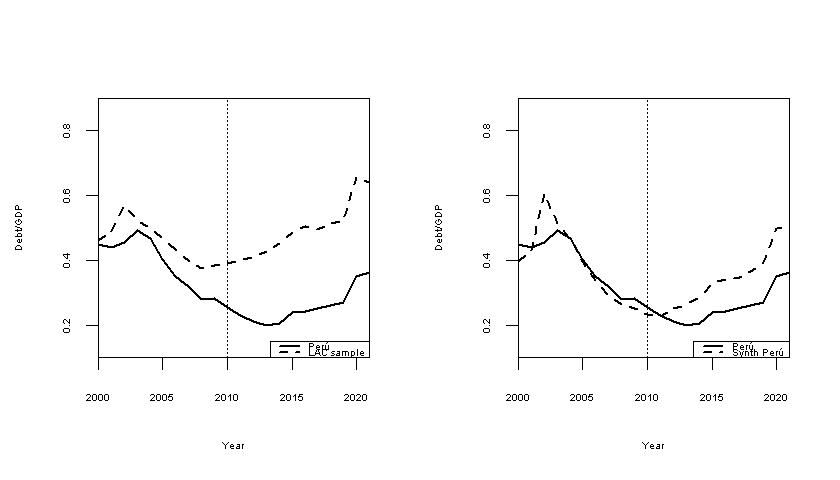

In [28]:
synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
options(repr.plot.width = 7, repr.plot.height = 4)
cexl = 0.5
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)
par(mfrow = c(1, 2))

# Primer gráfico
plot(2000:2021, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(2000:2021, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], col = "black", lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","LAC sample"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1-2, Text.height, col="black", length=.1)

# Segundo gráfico
plot(2000:2021, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","Synth Perú"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1, Text.height, col="black", length=.1)

par(mfrow = c(1, 1))



#### Efecto

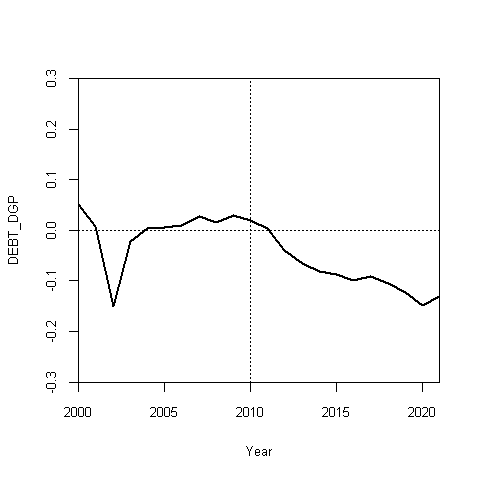

In [30]:
options(repr.plot.width = 4, repr.plot.height = 4)
cexl = 0.8
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)

gap <- dataprep.out$Y1-(dataprep.out$Y0%*%synth.out$solution.w)

plot(2000:2021,gap,
type="l",ylim=c(-0.3,0.3),col="black",lty="solid",
ylab ="DEBT_DGP",
     xlab ="Year",
     xaxs = "i", yaxs = "i",
     lwd=2)
     

abline(h=0,lty="dotted")
abline(v=2010,lty="dotted")
# text(2008,0.1,"Clause activation",cex=Cex.set)


### Placebo

Time placebo


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0009166834 

solution.v:
 0.002685502 0.7308959 0.2664185 

solution.w:
 0.08460841 0.09659075 0.1836077 0.09926372 0.08024276 0.1734108 0.0722696 0.1571715 0.0528348 



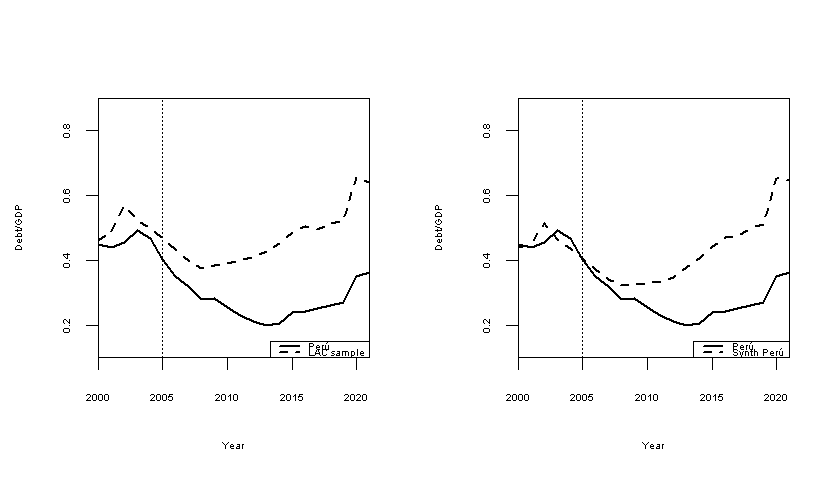

In [32]:
year_t0 = 2000 #AÑO AL INICIO
year_t1 = 2005 #AÑO ANTES DLE TRATAMIENTO
year_t2 = 2021

predictors_dp       = c("DEBT_GDP","EXP_GDP")
dependent_dp        = "DEBT_GDP"
id_variable         = which(names(d) == "WEO_CODE")
time_variable       = which(names(d) == "DATE")
special_predictors  = list(list("REV_GDP", year_t0:year_t1, c("mean"))) #OTROS PREDICTORES (EN LA MEDIA)
treated             = 293 #TRATADO --> PERÚ
controls            = setdiff(unique(d$WEO_CODE), treated) #EXLUYENDO AL TRATADO
time_predictors     = year_t0:year_t1
time_ssr            = year_t0:year_t1
names               = which(names(d) == "ISO3")
time_plot           = year_t0:year_t2


dataprep.out <-
  dataprep(
           foo = d,
           predictors    = predictors_dp,
           dependent     = dependent_dp,
           unit.variable = id_variable,
           time.variable = time_variable,
           special.predictors = special_predictors,
           treatment.identifier = treated,
           controls.identifier = controls,
           time.predictors.prior = time_predictors,
           time.optimize.ssr = time_ssr,
           unit.names.variable = names,
           time.plot = time_plot
         )

# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )

synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
options(repr.plot.width = 7, repr.plot.height = 4)
cexl = 0.5
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)
par(mfrow = c(1, 2))

# Primer gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], col = "black", lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","LAC sample"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1-2, Text.height, col="black", length=.1)

# Segundo gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","Synth Perú"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1, Text.height, col="black", length=.1)

par(mfrow = c(1, 1))


Unit placebo


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.01741896 

solution.v:
 0.3907052 0.2597582 0.3495366 

solution.w:
 4.385e-07 0.9485308 7.933e-07 5.944e-07 4.071e-07 4.882e-07 6.658e-07 3.726e-07 0.05146543 



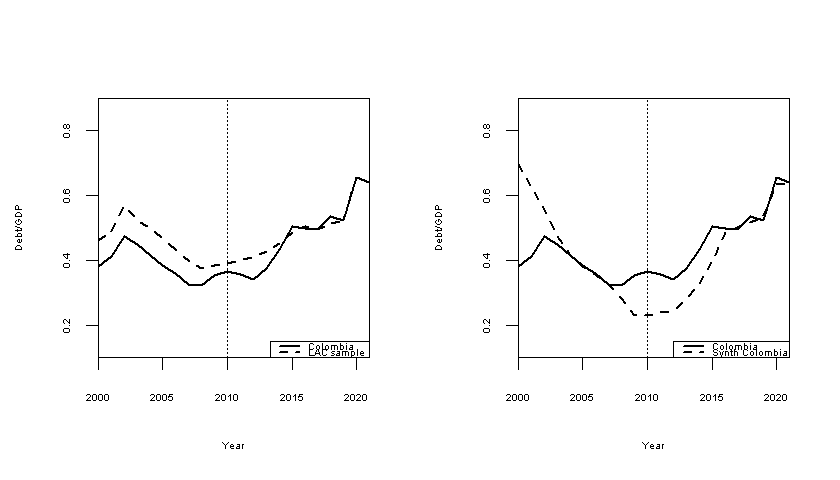

In [35]:
year_t0 = 2000 #AÑO AL INICIO
year_t1 = 2010 #AÑO ANTES DLE TRATAMIENTO
year_t2 = 2021

predictors_dp       = c("DEBT_GDP","EXP_GDP")
dependent_dp        = "DEBT_GDP"
id_variable         = which(names(d) == "WEO_CODE")
time_variable       = which(names(d) == "DATE")
special_predictors  = list(list("REV_GDP", year_t0:year_t1, c("mean"))) #OTROS PREDICTORES (EN LA MEDIA)
treated             = 233 #TRATADO --> colombia
controls            = setdiff(unique(d$WEO_CODE), treated) #EXLUYENDO AL TRATADO
time_predictors     = year_t0:year_t1
time_ssr            = year_t0:year_t1
names               = which(names(d) == "ISO3")
time_plot           = year_t0:year_t2


dataprep.out <-
  dataprep(
           foo = d,
           predictors    = predictors_dp,
           dependent     = dependent_dp,
           unit.variable = id_variable,
           time.variable = time_variable,
           special.predictors = special_predictors,
           treatment.identifier = treated,
           controls.identifier = controls,
           time.predictors.prior = time_predictors,
           time.optimize.ssr = time_ssr,
           unit.names.variable = names,
           time.plot = time_plot
         )

# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )


synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
options(repr.plot.width = 7, repr.plot.height = 4)
cexl = 0.5
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)
par(mfrow = c(1, 2))

# Primer gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], col = "black", lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Colombia","LAC sample"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1-2, Text.height, col="black", length=.1)

# Segundo gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Colombia","Synth Colombia"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1, Text.height, col="black", length=.1)

par(mfrow = c(1, 1))


Leave-one-out to construct p-values

In [139]:
# Asumiendo que d es tu dataframe y ya está cargado

# Definir los años
year_t0 = 2000 # Año al inicio
year_t1 = 2010 # Año antes del tratamiento
year_t2 = 2021 # Año final

# Lista de tratados
lista_tratados = unique(d$WEO_CODE)

# Preparar un dataframe para guardar los resultados
resultados = data.frame()

resultados_lista = list()

# Bucle para cada país o código en la lista de tratados
for (i in lista_tratados) {
    # Definir variables para dataprep
    predictors_dp = c("DEBT_GDP","EXP_GDP")
    dependent_dp = "DEBT_GDP"
    id_variable = which(names(d) == "WEO_CODE")
    time_variable = which(names(d) == "DATE")
    special_predictors = list(list("REV_GDP", year_t0:year_t1, c("mean")))
    treated = i
    controls = setdiff(unique(d$WEO_CODE), treated)
    time_predictors = year_t0:year_t1
    time_ssr = year_t0:year_t1
    names_variable = which(names(d) == "ISO3")
    time_plot = year_t0:year_t2

    # Ejecutar dataprep
    dataprep.out <- dataprep(
        foo = d,
        predictors = predictors_dp,
        dependent = dependent_dp,
        unit.variable = id_variable,
        time.variable = time_variable,
        special.predictors = special_predictors,
        treatment.identifier = treated,
        controls.identifier = controls,
        time.predictors.prior = time_predictors,
        time.optimize.ssr = time_ssr,
        unit.names.variable = names_variable,
        time.plot = time_plot
    )

    # Ejecutar synth
    synth.out <- synth(
        data.prep.obj = dataprep.out,
        Margin.ipop = .005,
        Sigf.ipop = 7,
        Bound.ipop = 6
    )

    gap <- dataprep.out$Y1-(dataprep.out$Y0%*%synth.out$solution.w)

    # Guardar los resultados
    # Crear un dataframe temporal

    nombre = as.character(i)

    temp_df <- data.frame(nombre = gap)
    
    resultados_lista[[nombre]] <- temp_df

}

# Ver los resultados
resultados <- do.call(cbind, resultados_lista)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.01741896 

solution.v:
 0.3907052 0.2597582 0.3495366 

solution.w:
 4.385e-07 0.9485308 7.933e-07 5.944e-07 4.071e-07 4.882e-07 6.658e-07 3.726e-07 0.05146543 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.005416497 

solution.v:
 0.4411743 0.5588257 1.71e-08 

solution.w:
 0.01392719 0.02083401 0.02765791 0.03788892 0.06104455 0.04375669 0.02226227 0.6813036 0.09132491 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.01477913 

solution.v:
 0.4243238 0.5751747 0.0005015576 

solution.w:
 0.6144042 2.75555e-05 4.

<0 x 0 matrix>

In [180]:
pvalues = list() 
controles = setdiff(unique(names(resultados)), "X293")

for (i in controles) {

    r = as.numeric(resultados[["X293"]]<resultados[[i]])
    nombre = as.character(i)
    temp_df <- data.frame(nombre = r)  
    pvalues[[nombre]] <- temp_df

}

pvalues <- do.call(cbind, pvalues)
colnames(pvalues) <- controles
p_values_emp = 1- colSums(t(pvalues))/8

Ratio RPMSE Post and Pre treatment

In [ ]:
# Text.height <- 23000
# Cex.set <- .8
# plot(2000:2021,dataprep.out$Y1plot,
# type="l",ylim=c(0.1,0.9),col="black",lty="solid",
# ylab ="DEBT_DGP",
#      xlab ="Year",
#      xaxs = "i", yaxs = "i",
#      lwd=2)

# lines(2000:2021, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], 
#       col = "black", lty = "dashed", lwd = 2)

# abline(v=year_t1,lty="dotted")

# legend(x="bottomright",
#        legend=c("Perú","Rest of the LAC sample")
#       ,lty=c("solid","dashed"),col=c("black","black")
#       ,cex=.8,bg="white",lwd=c(2,2))

# arrows(year_t1-2,Text.height,year_t1-2,Text.height,col="black",length=.1)


# synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
# plot(2000:2021,dataprep.out$Y1plot,
# type="l",ylim=c(0.1,0.9),col="black",lty="solid",
# ylab ="DEBT_DGP",
#      xlab ="Year",
#      xaxs = "i", yaxs = "i",
#      lwd=2)
     

# lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)

# abline(v=year_t1,lty="dotted")

# legend(x="bottomright",
#        legend=c("Actual Perú","Synth Perú")
#       ,lty=c("solid","dashed"),col=c("black","black")
#       ,cex=.8,bg="white",lwd=c(2,2))

# arrows(year_t1-2,Text.height,year_t1,Text.height,col="black",length=.1)
